In [1]:
import torchvision
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import tqdm

c:\Users\Hamza\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from torchvision.models import resnet18

In [3]:
CNN_01 = resnet18(pretrained = True)

c:\Users\Hamza\venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Hamza\venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [4]:
CNN_01

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [5]:
from torchvision.datasets import CIFAR10

In [6]:
from pathlib import Path
data = Path('Apni_file/')
if data.is_file():
    print('Already there')
else:
    data.mkdir(parents=True,exist_ok=True)
    print('Directory Made!')

Directory Made!


In [7]:
train_dataset = CIFAR10(
    root = data,
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

In [8]:
test_dataset = CIFAR10(
    root = data,
    train = False,
    download = True,
    transform=torchvision.transforms.ToTensor()
)

In [9]:
len(test_dataset),len(train_dataset)

(10000, 50000)

In [10]:
train_dataset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [11]:
from torch.utils.data import DataLoader

In [12]:
train_dataloader = DataLoader(
    dataset=train_dataset,
    batch_size=32,
    shuffle=True
)
test_dataloader = DataLoader(
    dataset=test_dataset,
    batch_size=32,
    shuffle=False
)

In [13]:
print(f'Train DataLoader has {len(train_dataloader)} batches of {train_dataloader.batch_size} ')
print(f'Test DataLoader has {len(test_dataloader)} batches of {test_dataloader.batch_size} ')

Train DataLoader has 1563 batches of 32 
Test DataLoader has 313 batches of 32 


In [14]:
image,label = next(iter(train_dataloader))
image.shape

torch.Size([32, 3, 32, 32])

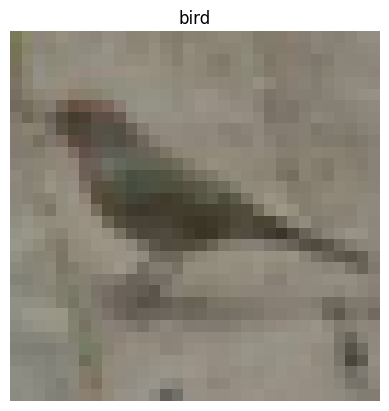

In [15]:
plt.imshow(image[30].permute(1,2,0))
plt.title(test_dataset.classes[label[30]])
plt.axis(False)
plt.show()

In [16]:
LOSS = nn.CrossEntropyLoss()
OPTIMIZER = torch.optim.Adam(params = CNN_01.parameters(),lr=0.001)

In [ ]:
from MN